# Home Assignment No. 2: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

## Task 1.1. Boosting, part 1. (2 points)


> Boosting Machines (BM) are a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, that perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is acheived by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in [Lecture 7](https://github.com/adasegroup/ML2020_lectures).

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

#### Place for ypur solution

In [10]:
%matplotlib inline
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

import seaborn as sns

from scipy.optimize import minimize

from sklearn.datasets import make_moons, load_breast_cancer
import sklearn.datasets as dt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Ridge, BayesianRidge
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [11]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.labelsize'] = 16
plt.xkcd()

In [3]:
plt.rcParams.keys()

/usr/lib/python3.6/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [4]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

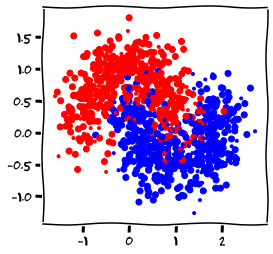

In [6]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

base classifier

* `ada_boost_alpha` - function, which calculates the weights of the linear combination of the classifiers
* `ada_boost_distribution` - function, which calculates sample weights

Implement htese procedures

In [7]:
### Now let us define functions to calculate alphas and distributions for AdaBosot algorithm

def ada_boost_alpha(y, y_pred_t, distribution):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    
    N_t = (distribution * (y * y_pred_t <= 0)).sum()
    
    alpha = np.log((1 - N_t) / N_t) / 2

    return alpha

In [8]:
def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    
    distribution *= distribution.sum() * np.exp(- alpha_t * y * y_pred_t)
    
    return distribution

Our custom boosting class

In [9]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            # ======= Your code here ======
            
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)
            
            # update alphas, append new alpha to self.alphas
            alpha = self.get_alpha(y, y_pred, distribution)
            self.alphas.append(alpha)
            
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred, distribution, alpha)
            distribution /= distribution.sum()
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
            
        # ====== Your code here ======
        # get the weighted votes of the classifiers
        clfs = self.classifiers
        out = np.dot(np.diag(self.alphas), np.array(list(map(lambda x: x.predict(X), self.classifiers)))).sum(axis=0)
        
        return np.sign(out)

In [10]:
max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [11]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


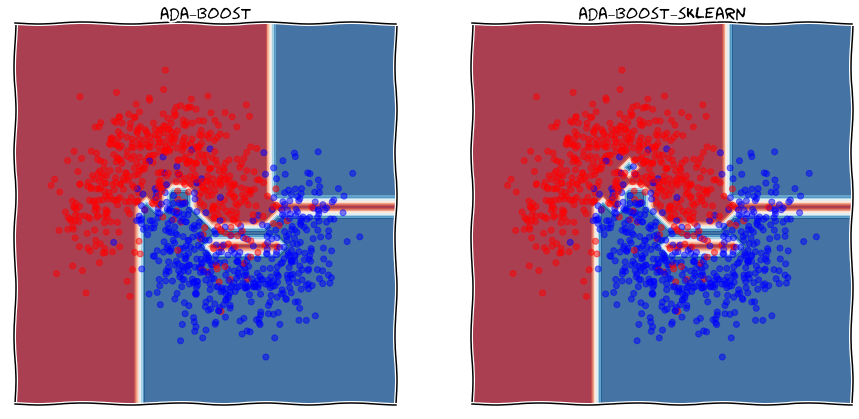

In [12]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))


## Task 1.2. Boosting, part 2. (2 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to instead recompute all of the alphas after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the avaliable estimators. Take into account, that at each step of the boosting algorithm **all** alphas and, consequntly, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the reguralization parameter([Lecture 2, slide 14](https://github.com/adasegroup/ML2020_lectures/blob/master/lecture2/Lecture_2_Regression.pdf)). Add it in order to guarantee the existence of the solution.

In [13]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    # ====== Your code here =====
    return minimize(lambda alphas, y, y_pred, C, n_estimators: np.mean(np.exp(-y * np.dot(alphas, y_pred))) + 
                                                               C * np.inner(alphas, alphas), 
                    np.ones(len(y_pred)) / len(y_pred), args=(y, y_pred, C, len(y_pred))).x
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """

    # ====== Your code here =====
    return np.exp(-y * np.dot(alphas, y_pred))

In [14]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            # ======= Your code here ======
            # create a list of predictions across all classifiers
            preds = np.array([clf.predict(X) for clf in self.classifiers])

            # recalculate alphas, add them to the matrix of self.alphas 
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            new_alphas = np.zeros([n_estimators])
            obtained_alphas = self.get_alpha(y, preds, self.C)
            new_alphas[:i + 1] = obtained_alphas
            
            self.alphas[i] = new_alphas
            
            # update distribution and normalize
            distribution = self.update_distribution(y, preds, obtained_alphas)
            
            distribution /= distribution.sum()
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        # ====== Your code here ======
        #get the weighted votes of the classifiers
        #do not forget that self.alphas is the whole history of recalculated alphas!

        clfs = self.classifiers
        out = np.dot(np.array(list(map(lambda x: x.predict(X), self.classifiers))).T, self.alphas[-1])
        
        return np.sign(out)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [16]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.92
accuracy ada_boost_sklearn: 0.875


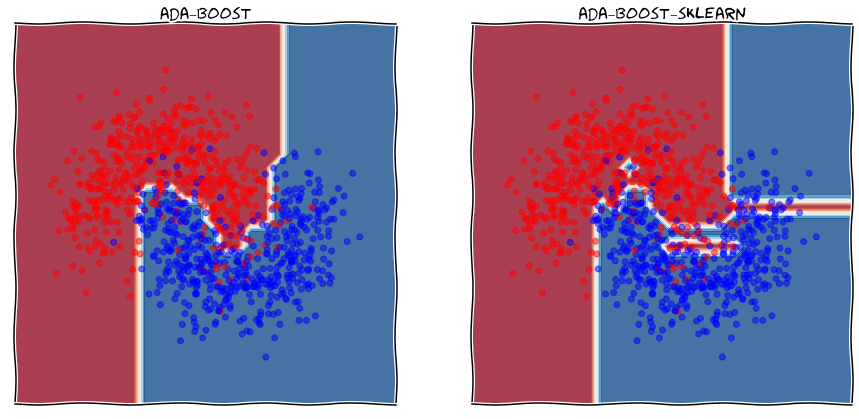

In [17]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

In [18]:
def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

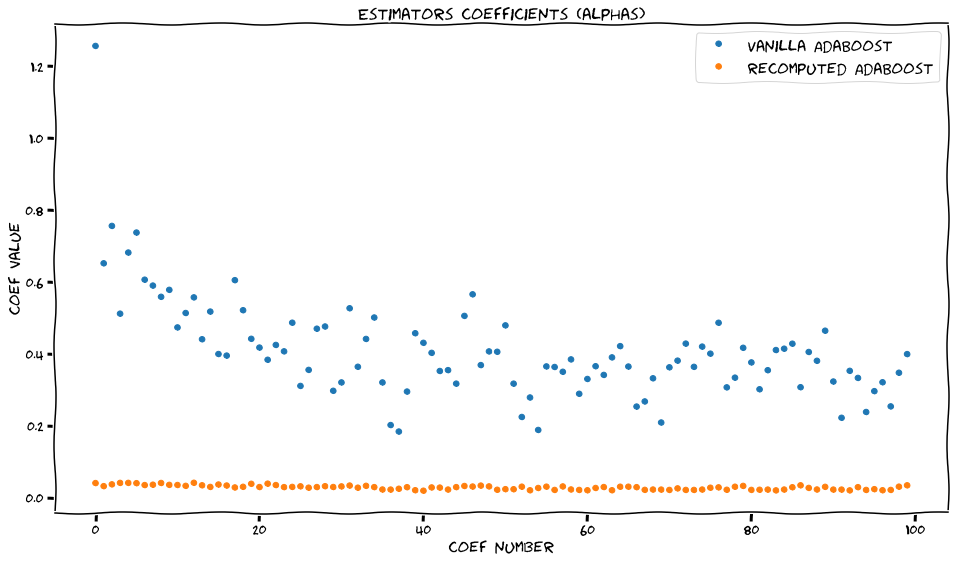

In [19]:
## Plot the resulting alphas (last calculated in case of recomputed alphas)
plt.figure()
plt.title('Estimators coefficients (alphas)')
plt.plot(ada_boost1.alphas, label='Vanilla AdaBoost', marker='o', linestyle='None', markersize=5)
plt.plot(ada_boost.alphas[-1], label='recomputed AdaBoost', marker='o', linestyle='None', markersize=5)
plt.xlabel('coef number')
plt.ylabel('coef value')
plt.legend()
plt.show()

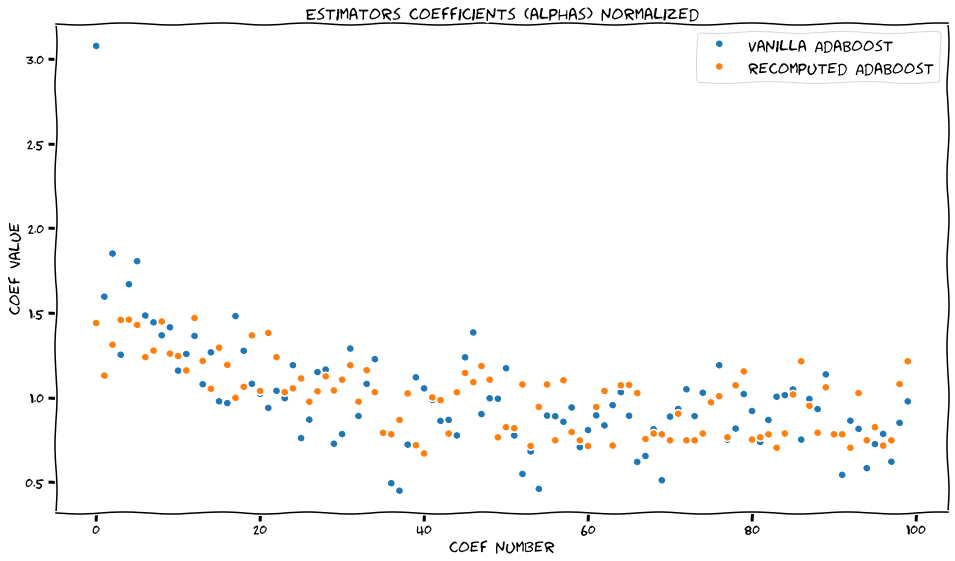

In [20]:
plt.figure()
plt.title('Estimators coefficients (alphas) normalized')
plt.plot(ada_boost1.alphas / np.mean(ada_boost1.alphas), label='Vanilla AdaBoost', marker='o', linestyle='None', markersize=5)
plt.plot(ada_boost.alphas[-1] / np.mean(ada_boost.alphas[-1]), label='recomputed AdaBoost', marker='o', linestyle='None', markersize=5)
plt.xlabel('coef number')
plt.ylabel('coef value')
plt.legend()
plt.show()

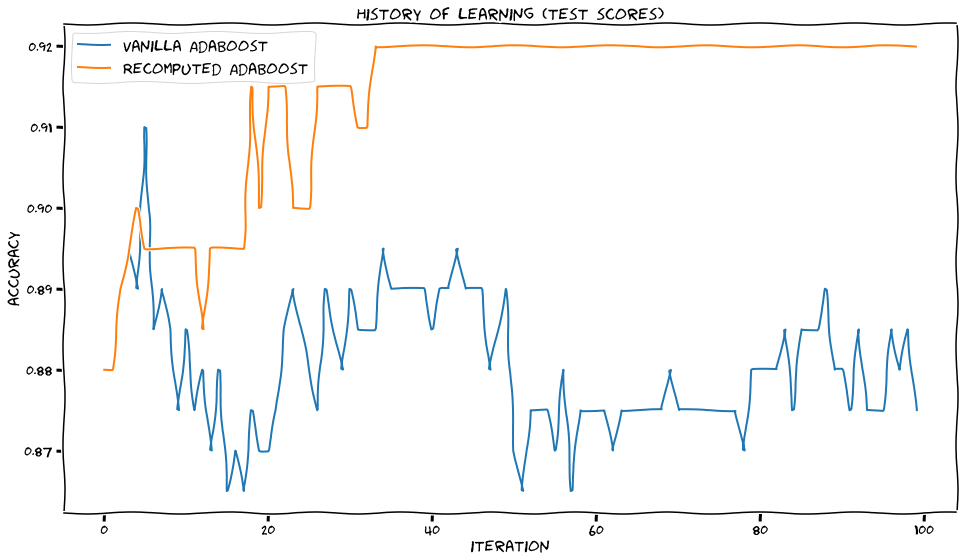

In [21]:
## Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) 
## for AdaBoost and RecomputedAdaBoost
plt.figure()
ada_scores1 = [score(construct_alpha_history(ada_boost1.alphas)[i], ada_boost1.classifiers, X_test, y_test) 
              for i in range(len(ada_boost1.alphas))]
ada_scores = [score(ada_boost.alphas[i], ada_boost.classifiers, X_test, y_test) 
              for i in range(len(ada_boost.alphas))]

plt.plot(ada_scores1, label='Vanilla AdaBoost')
plt.plot(ada_scores, label='Recomputed AdaBoost')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('History of learning (test scores)')
plt.legend()
plt.show()

Make a conclusion about which method is better and in which case. 

## Your answer
From the plots we can see that obtained coefficients differ in the absolute values veru much, but normalized picture is more or less the same. Moreover, I performed an experiment, changing `mean()` in the `loss()` function to the `sum()` (basically, it is the same as changing regularization parameter) and found out that in this case recomputed ada boost achieves the same absolute values of coefficients (nothing strange, it is equivalent to making $C$ higher)

Moreover, we see, that recomputed adaboost performed significantly better, then vanilla adaboost. It even has reached plato for the test set accuracy, which may mean that the model is more stable in a sense.

## Task 2. Gradient Boosting and Feature Selection (1 point)

Gradient Boosting Machines (GBM) are a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are the extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one varinat of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterwards, compare the models' feature importances. 

**The task**
* train the XGBoost classifier on the provided dataset
  * measure the training time
  * measure the precision/recall on the test set
  * plot ROC-curve

* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

* compare the feature importances of the trained XGBoost and Random Forest Classifiers. Why do you think they are different? Explain.

* for each model, sort the features by their importance, and plot the dependence of the test score on the number of features selected by best importance

*Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall.

**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

Make sure that you have installed the XGBoost package before starting the task. 

**HINT**: in order to measure the training time you can use [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [22]:
data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the precision/recall on the test set
* plot ROC-curve
* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

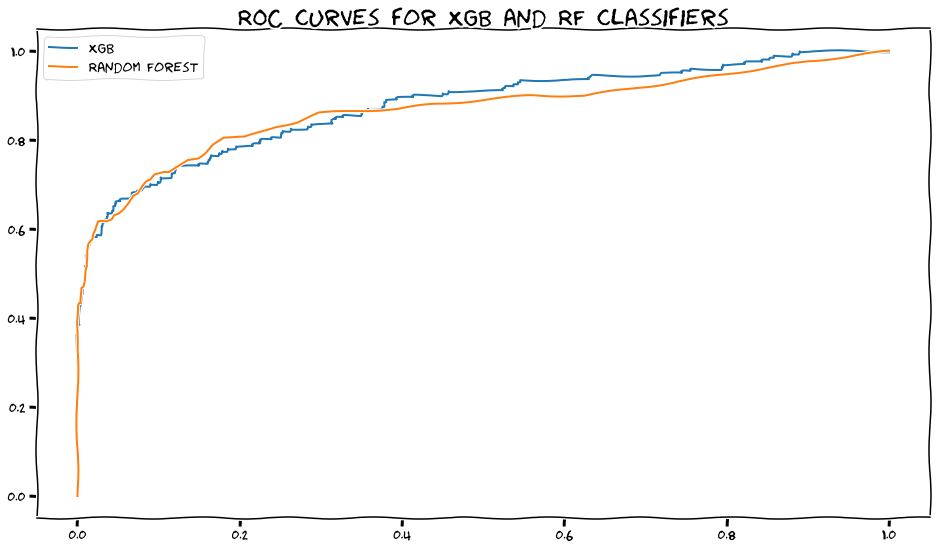

XGBoost training time: 1.13 sec
XGBoost precision / recall: 0.88 / 0.55


In [23]:
###YOUR CODE###
xgb = XGBClassifier()

start = time()
xgb.fit(X_train, y_train)
end = time()
xgb_pred, xgb_pred_proba = xgb.predict(X_test), xgb.predict_proba(X_test)[:, 1]
xgb_precision, xgb_recall = precision_score(y_test, xgb_pred), recall_score(y_test, xgb_pred)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred, rf_pred_proba = rf.predict(X_test), rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)

plt.figure(figsize=(16, 9))
plt.title("ROC curves for XGB and RF classifiers", fontsize=24)
plt.plot(fpr_xgb, tpr_xgb, label='XGB')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.legend(fontsize=14)
plt.show()

print("XGBoost training time: %.2f sec" % (end - start))
print("XGBoost precision / recall: %.2f / %.2f" % (xgb_precision, xgb_recall))


* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

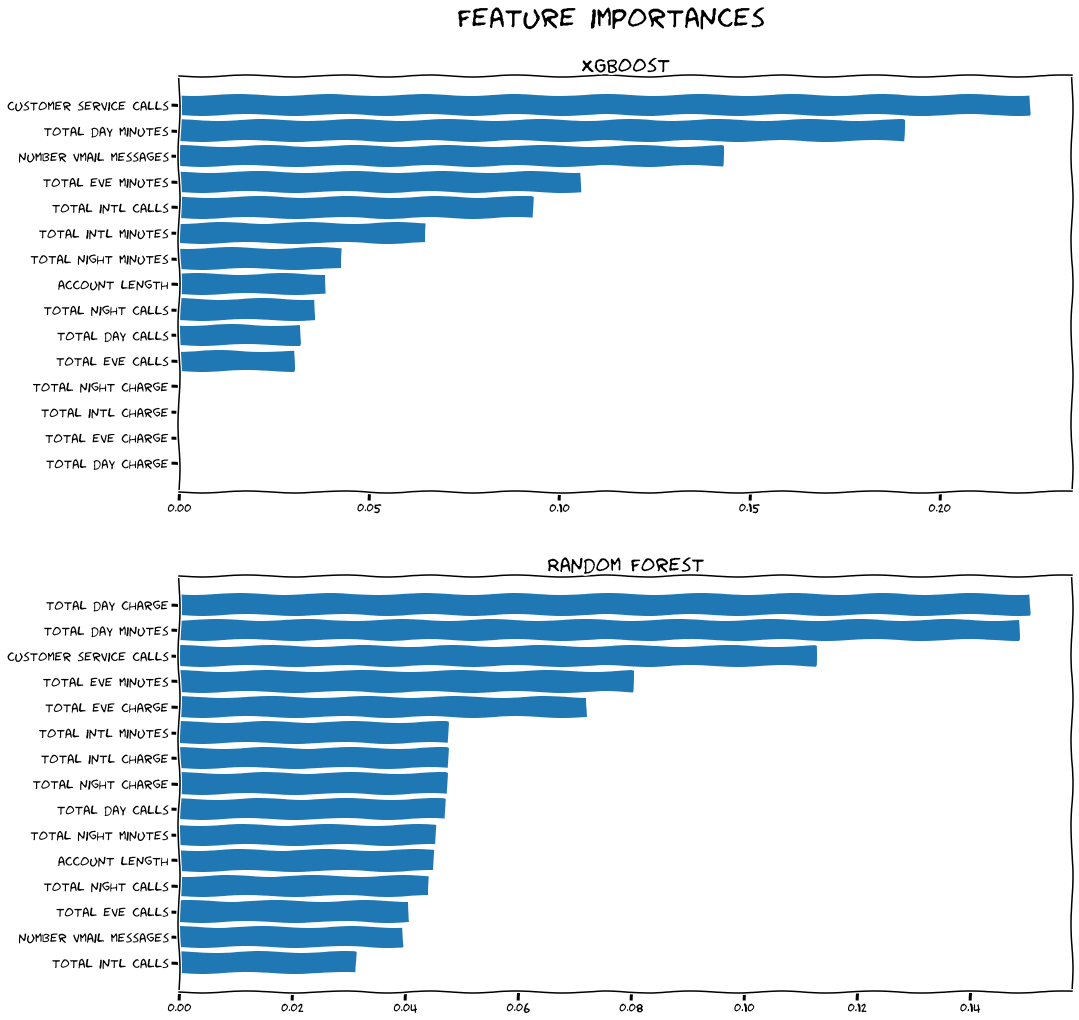

In [24]:
###YOUR CODE###
from xgboost import plot_importance

# plt.figure(figsize=(16, 9))
# plot_importance(xgb)

fig, ax = plt.subplots(2, 1, figsize=(16, 16))
plt.subplots_adjust(top=0.92)
fig.suptitle("Feature importances", fontsize=28)
ax[0].set_title('XGBoost', fontsize=20)
ax[0].barh([col for _, col in sorted(zip(xgb.feature_importances_, cols))], sorted(xgb.feature_importances_))
ax[1].set_title('Random Forest', fontsize=20)
ax[1].barh([col for _, col in sorted(zip(rf.feature_importances_, cols))], sorted(rf.feature_importances_))
ax[0].tick_params(labelsize=13)
ax[1].tick_params(labelsize=13)
plt.show()

## Comment
We see that selected features differ dramatically. Boosting algorithm has not even take into account some of them, because features that are not important, are not used by weak learners with low depth. However, random forest always chooses random subset of features to be used during estimator learning, so there is always non zero importance for some features.

* Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall. **HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

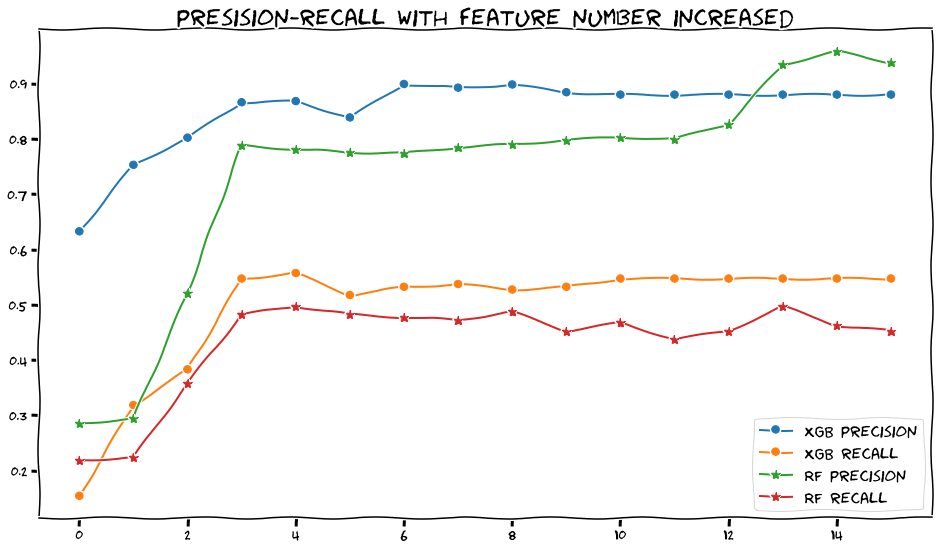

In [25]:
###YOUR CODE###
def increased_subset_learning(model, pretrained_model, X_train, y_train, y_test):
    precisions = []
    recalls = []

    for i in range(len(cols)):
        selector = SelectFromModel(pretrained_model, threshold=-np.inf, prefit=True, max_features=(i + 1))
        clf = model()
        clf.fit(selector.transform(X_train), y_train)
        precisions.append(precision_score(y_test, clf.predict(selector.transform(X_test))))
        recalls.append(recall_score(y_test, clf.predict(selector.transform(X_test))))
    return precisions, recalls
    
plt.figure()
plt.title('presision-recall with feature number increased', fontsize=24)
prec, rec = increased_subset_learning(XGBClassifier, xgb, X_train, y_train, y_test)
plt.plot(prec, label='XGB precision', marker='o', markersize=7)
plt.plot(rec, label='XGB recall', marker='o', markersize=7)
prec, rec = increased_subset_learning(RandomForestClassifier, rf, X_train, y_train, y_test)
plt.plot(prec, label='RF precision', marker='*', markersize=9)
plt.plot(rec, label='RF recall', marker='*', markersize=9)
plt.legend();

# Task 3. Bayesian methods (1 point)

In this task you are asked to compare the performance of the common Ridge Regression with its the parameters chosen using cross-validation technique and Bayesian Ridge Regression. 

In particular, using [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html), find the optimal value for the reguralization coefficient in the ridge regression optimization problem formulation. Then train [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression) and compare the absolute error and learnt coefficients distribution for both variants and make some conclusions on both methods.

**The task:** 
* Use crossvalidation technique to choose the optimal value of reguralization coefficent for Ridge Regression model. (**Note:** "optimal" value here, means the one that lets the model with this particular parameter value achieve better performance compared to the other variants). 
* Fit Bayesian Ridge Regression model 
* Plot the absolute error historgramms for both models using [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html).
* Plot historgrams of coefficients of regression derived from both models (in cross-validation case the coefficients of the best model)
* Compare the two pairs of histrograms. Are they the same or different? Why? What are the prons and cons of both methods?

In [26]:
X,y = dt.load_boston(return_X_y=True)
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [27]:
###YOUR CODE###
params = {'alpha' : np.linspace(0.1, 1000, 10000)}
ridge = GridSearchCV(Ridge(), params, n_jobs=-1)
ridge.fit(X_train, y_train.ravel())
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train.ravel())

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [28]:
ridge.best_params_

{'alpha': 177.09999999999997}

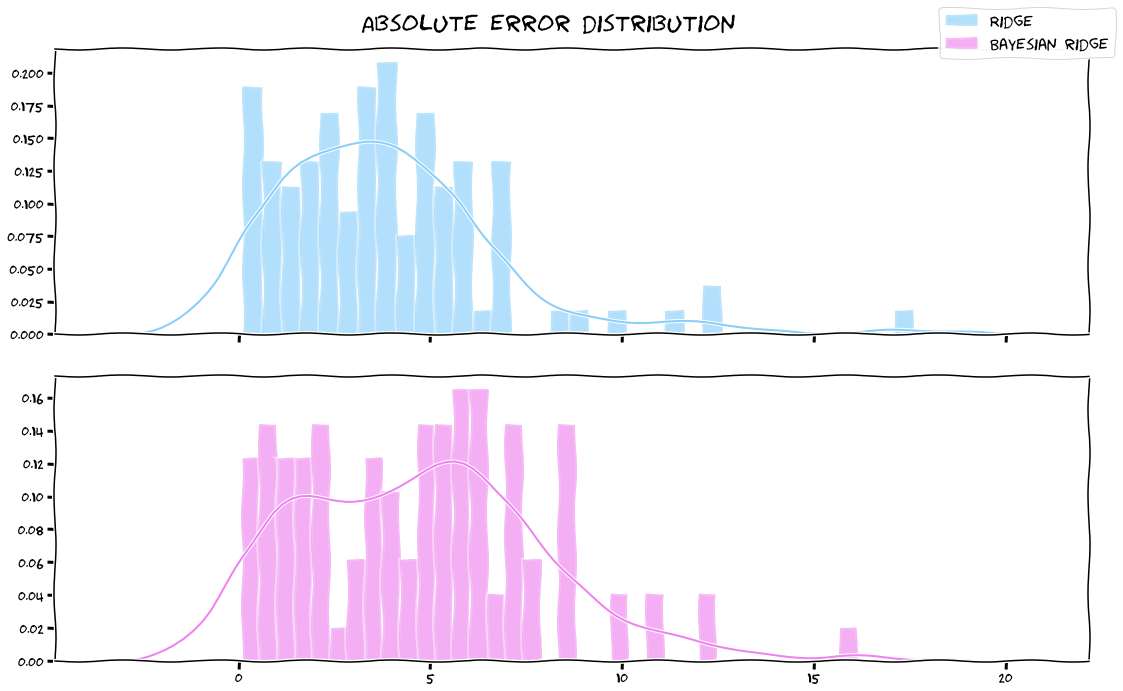

In [29]:
ridge_abs = np.abs(y_test - ridge.predict(X_test)).flatten()
bayes_abs = np.abs(y_test - bayes_ridge.predict(X_test)).flatten()

fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
fig.suptitle('Absolute error distribution', fontsize=24)
sns.distplot(ridge_abs, color='lightskyblue', ax=axes[0], label='Ridge', bins=int(ridge_abs.shape[0] / 3))
sns.distplot(bayes_abs, color='violet', ax=axes[1], label='Bayesian ridge', bins=int(ridge_abs.shape[0] / 3))
# titles aren't shown, idk how to fix it (i tried)
ax[0].set_title('Ridge regression')
ax[1].set_title('Bayesian ridge regression')
fig.legend()
fig.tight_layout(pad=2.5)
fig.subplots_adjust(top=0.93)
plt.show()

## Comment
We see that vanilla ridge regression has more "normal" distribution", but for bayesian regression, we achieved slightly lower absolute values of errors

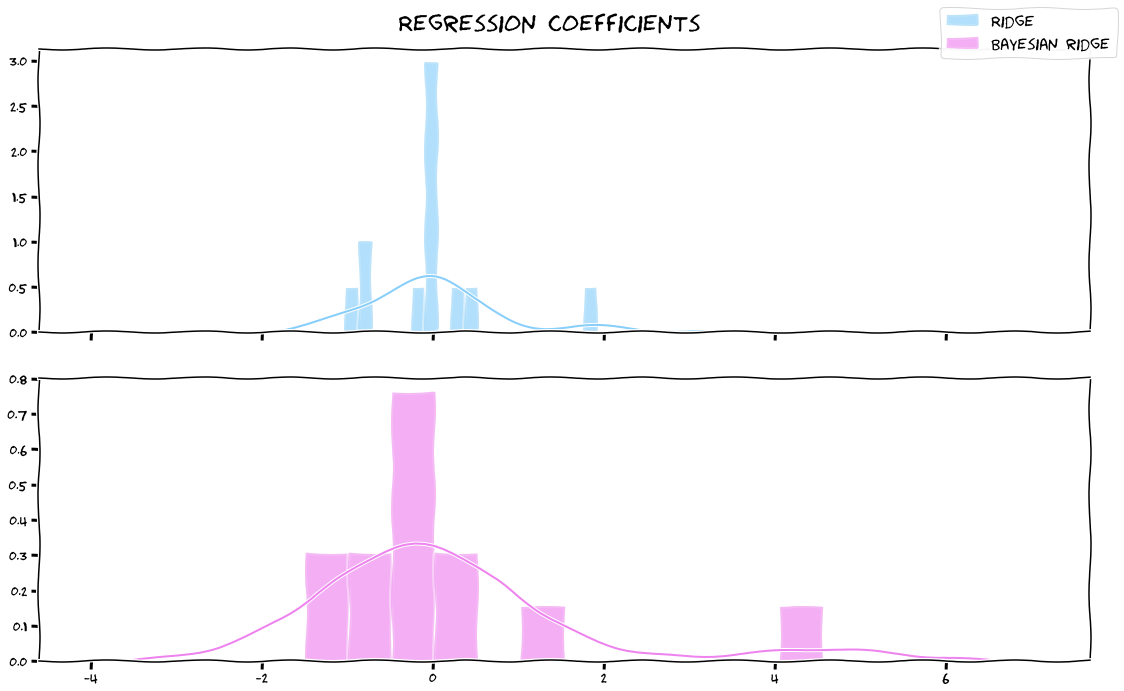

In [30]:
ridge_coefs = ridge.best_estimator_.coef_
bayes_coefs = bayes_ridge.coef_

fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
fig.suptitle('Regression coefficients', fontsize=24)
sns.distplot(ridge_coefs, color='lightskyblue', ax=axes[0], label='Ridge')
sns.distplot(bayes_coefs, color='violet', ax=axes[1], label='Bayesian ridge')
# titles aren't shown, idk how to fix it (i tried)
ax[0].set_title('Ridge regression')
ax[1].set_title('Bayesian ridge regression')
fig.legend()
fig.tight_layout(pad=2.5)
fig.subplots_adjust(top=0.93)
plt.show()

## Comment
Here we see that vanilla ridge regression was able to find a feature which is significantly more important, than other features. Maybe we can even use feautre importances from ridge regresion to put some of features away. Bayesian model, however, found more balanced solution for the problem, having feature importances more equal.

# Task 4. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results.Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta model, which uses the predictions of base models as features. This technique is wiledly used in multiple real case scenarios to get better results. One of the main problem of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Train metaclassifier on original datasets features, report score on test.
* Train meta_classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [31]:
import sklearn
from tqdm import tqdm
X, y = sklearn.datasets.fetch_covtype(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Write meta classifier function.

In [32]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param y_train: numpy array or pandas table, target for train set.
    :param X_test: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ###YOUR CODE###
    meta_factors_train = np.zeros((X_train.shape[0], len(base_clfs)))
    meta_factors_test = np.zeros((X_test.shape[0], len(base_clfs)))
    
    kf = KFold(n_splits=7)
    
    for i, clf in enumerate(base_clfs):
        start = time()
        for train_index, test_index in kf.split(X_train):
            X_train_clf, X_test_clf = X_train[test_index], X_train[train_index]
            y_train_clf, y_test_clf = y_train[test_index], y_train[train_index]
            clf.fit(X_train_clf, y_train_clf)
            meta_factors_train[:, i][train_index] = clf.predict(X_test_clf)
        meta_factors_test[:, i] = clf.fit(X_train, y_train).predict(X_test)
        end = time()
        print("%d-th clf done in %.2f minutes" % (i, (end - start) / 60))
        
    final_classifier.fit(meta_factors_train, y_train)
    
    return final_classifier.predict(meta_factors_test), final_classifier


Chose 6 different base models(base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml,features e.t.c) and train them. 

In [36]:
### YOUR CODE###
clfs = [RandomForestClassifier(max_depth=20, n_jobs=-1), 
        RandomForestClassifier(max_depth=40, n_jobs=-1), 
        ExtraTreesClassifier(max_depth=None, n_jobs=-1), 
        AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=40),
        AdaBoostClassifier(base_estimator=ExtraTreesClassifier(), n_estimators=40),
        XGBClassifier(max_depth=5, n_jobs=-1)]

labels = ["RandomForest1",
          "RandomForest2",
          "ExtremelyRandomizedForest",
          "AdaBoost-RandomForest",
          "AdaBoost-ExtremelyRandomizedForest",
          "XGBoost"]

for i, clf in enumerate(clfs):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("%s accuracy score: %.2f" % (labels[i], accuracy_score(y_test, clf.predict(X_test))))
    print("Model was fitted in %.2f minutes\n" % ((end - start) / 60))

RandomForest1 accuracy score: 0.89
Model was fitted in 0.27 minutes

RandomForest2 accuracy score: 0.95
Model was fitted in 0.29 minutes

ExtremelyRandomizedForest accuracy score: 0.95
Model was fitted in 0.34 minutes

AdaBoost-RandomForest accuracy score: 0.95
Model was fitted in 1.08 minutes

AdaBoost-ExtremelyRandomizedForest accuracy score: 0.95
Model was fitted in 1.03 minutes

XGBoost accuracy score: 0.79
Model was fitted in 6.10 minutes



Report individual scores on test set. As a score use accuracy.

Train metaclassifier on original datasets features. And report score on test.

## Comment
1. Metaclassifier is the same as the last base classifier - XGBoost, so the task is done already
2. All of the used models are without warm start by default, so we can safely fit them in the `meta_classifier` function from scratch

Train meta_classifier on those base models .

In [37]:
###YOUR CODE###
start = time()
preds, meta_clf = meta_classifier(clfs, XGBClassifier(), X_train, X_test, y_train)
end = time()
print(f"Metaclassifier learned in {(end - start) / 60} minutes")

0-th clf done in 0.60 minutes
1-th clf done in 0.69 minutes
2-th clf done in 0.83 minutes
3-th clf done in 2.90 minutes
4-th clf done in 2.98 minutes
5-th clf done in 12.73 minutes
Metaclassifier learned in 21.487024354934693 minutes


Report score(accuracy) on test. 

In [38]:
###YOUR CODE###
print("Metaclassifier accuracy score: %.2f" % accuracy_score(y_test, preds))

Metaclassifier accuracy score: 0.95


In [39]:
start = time()
preds, meta_clf = meta_classifier(clfs, LogisticRegression(), X_train, X_test, y_train)
end = time()
print(f"Metaclassifier learned in {(end - start) / 60} minutes")
print("Metaclassifier accuracy score: %.2f" % accuracy_score(y_test, preds))

0-th clf done in 0.56 minutes
1-th clf done in 0.65 minutes
2-th clf done in 0.78 minutes
3-th clf done in 3.92 minutes
4-th clf done in 2.67 minutes
5-th clf done in 11.99 minutes


/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Metaclassifier learned in 20.948088439305625 minutes
Metaclassifier accuracy score: 0.91


In [41]:
print("Metaclassifier accuracy score: %.2f" % accuracy_score(y_test, LogisticRegression(max_iter=1000).fit(X_train, y_train).predict(X_test)))

Metaclassifier accuracy score: 0.69


/home/topshik/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Does stacking helped to gain better score?

## Your answer
As we see from the experiment, stacking with XGBoost as a metaclassifier showed significantly better results, than jsut XGBoost fitted to the data. But, apparently, several trees ensembles showed the same result as stacking did.

I have also tried to use LogisticRegression as a metaclassifier. For this model we also see a significant improvement. (yep, in the experiments I've reached iterations limit. I'll try to run more experiments if I'll have time)

I think the results can be intuitevely explained as follows. Most of the used base classifiers have it's own score rather high. Maybe they make mistakes on the same objects (can be studied, but it's beyond homework). In this case we shouldn't be surprised that meta classifier can't beat the best base classifier, because it basically assigns weight to the "same" classifiers. However, stacking seems to be extremely usefull in case of having a set of weak base classifiers, so that they can make mistakes on completely different subsets of data.

# Task 5. Gaussian Processes (1 point)

In the following exercise you will need to fit the gaussian process with different kernels on the ```elecricity_conpumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('data/elecricity_conpumption_FR.csv')


In [14]:
data.dropna(inplace=True)

In [15]:
y = np.array(data.values)
X = np.array(data.index)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [17]:
X_train.shape

(256, 1)

* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.

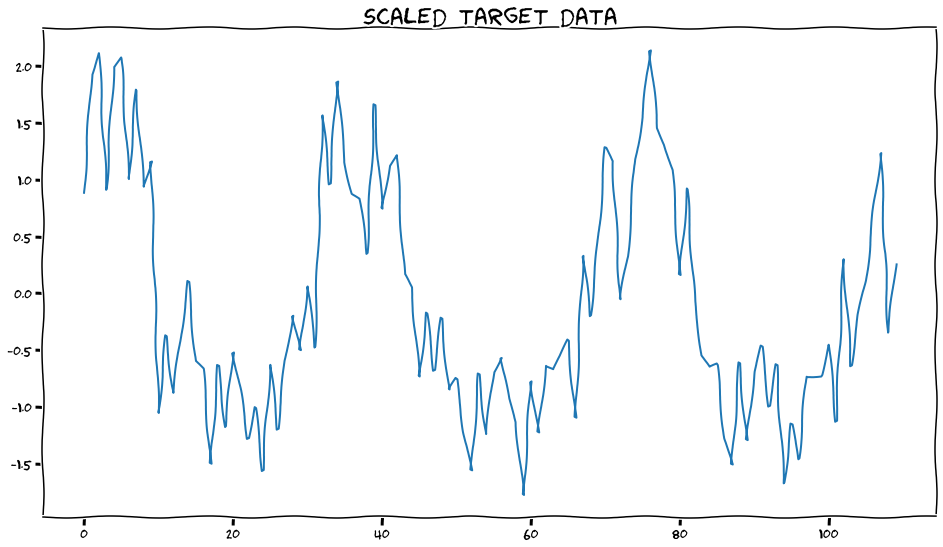

In [29]:
###YOUR CODE###
scaler = StandardScaler().fit(y_train)
y_train_scaled, y_test_scaled = scaler.transform(y_train), scaler.transform(y_test)
plt.figure()
plt.title('Scaled target data', fontsize=24)
plt.plot(y_test_scaled)
plt.show()

In [135]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear,PeriodicExponential
from sklearn.metrics import r2_score, make_scorer
import GPy.kern as kern

In [141]:
from sklearn.base import BaseEstimator

class NormalniyGP(BaseEstimator):
    def __init__(self, model=GPRegression, kernel=PeriodicExponential, variance=1, period=None, lengthscale=None):
        self.model = model
        self.kernel = kernel
        self.variance = variance
        self.period = period
        self.lengthscale = lengthscale
    
    def fit(self, X_train, y_train):
        # i decided not to implement the part with kernels combination
#         if len(self.kernel) == 2:
#             if op == '+':
#                 self.kernel = self.kernel[0](input_dim=1, variance=self.variance, lengthscale=self.lengthscale) + 
#                               self.kernel[1](input_dim=1, variance=self.variance, lengthscale=self.lengthscale)
#             if op == '*':
#                 self.kernel = self.kernel[0](input_dim=1, variance=self.variance, lengthscale=self.lengthscale) * 
#                               self.kernel[1](input_dim=1, variance=self.variance, lengthscale=self.lengthscale)
        if self.kernel == StdPeriodic or self.kernel == PeriodicExponential:
            self.model = self.model(X_train, y_train, kernel=self.kernel(input_dim=1, 
                                                                         variance=self.variance,
                                                                         period=self.period))
        else:
            self.model = self.model(X_train, y_train, kernel=self.kernel(input_dim=1))
        self.model.optimize(optimizer='lbfgs')
        return self
    
    def predict(self, X_test):
        return self.model.predict(X_test)[0]
    
# RBF - none
# Poly - none
# StdPeriodic - variance, period, lengthscale
# White - none
# PeriodicExponential - variance, period, lengthscale

 /home/topshik/.local/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater
 /home/topshik/.local/lib/python3.6/site-packages/paramz/transformations.py:108: RuntimeWarning:invalid value encountered in greater
 /home/topshik/.local/lib/python3.6/site-packages/paramz/transformations.py:113: RuntimeWarning:invalid value encountered in greater


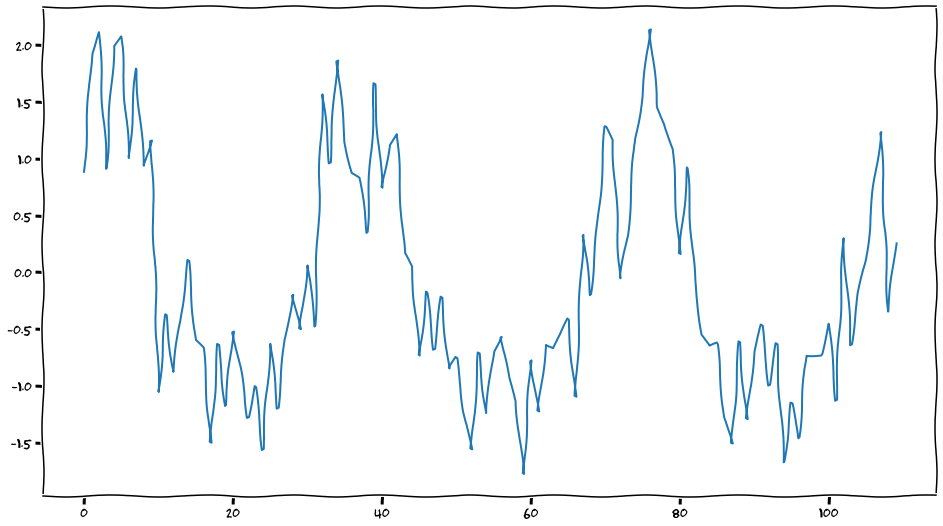

In [148]:
norm_gp = NormalniyGP(GPRegression, kernel=PeriodicExponential)
norm_gp.fit(X_train, y_train_scaled)
plt.plot(y_test_scaled)
plt.plot(norm_gp.predict(X_test))

In [142]:
kernels = [RBF, Poly, StdPeriodic, PeriodicExponential]
params = {'kernel' : kernels,
          'variance' : np.linspace(0.5, 10, 20),
          'period' : np.linspace(30, 50, 5).astype('int64')}
#           'lengthscale' : np.linspace(1, 20, 30)}

# kernels2 = []

# operations = {'+': lambda x, y: x + y, '*': lambda x, y: x * y}
# for i, (op, op_name) in enumerate(operations.items()):
#     kernel = op(kernels[0], kernels[1])
#     kernels2.append(kernel)

# params2 = {'kernel' : kernels2,
#           'variance' : np.linspace(0.5, 10, 20),
#           'lengthscale' : np.linspace(1, 20, 30)}


In [143]:
search = GridSearchCV(NormalniyGP(), params, n_jobs=-1, scoring=make_scorer(r2_score), verbose=True, cv=3)
search.fit(X_train, y_train_scaled)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   31.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=NormalniyGP(kernel=<class 'GPy.kern.src.periodic.PeriodicExponential'>,
                                   lengthscale=None,
                                   model=<class 'GPy.models.gp_regression.GPRegression'>,
                                   period=None, variance=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': [<class 'GPy.kern.src.rbf.RBF'>,
                                    <class 'GPy.kern.src.poly.Poly'>,
                                    <class 'GPy.kern.src.standard_periodic.StdPeriodic'>,
                                    <class 'GPy.kern.src.periodic.PeriodicExponential'>],
                         'period': array([30, 35, 40, 45, 50]),
                         'variance': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

r2 score:  0.7216444644166504
{'kernel': <class 'GPy.kern.src.standard_periodic.StdPeriodic'>, 'period': 35, 'variance': 3.0}


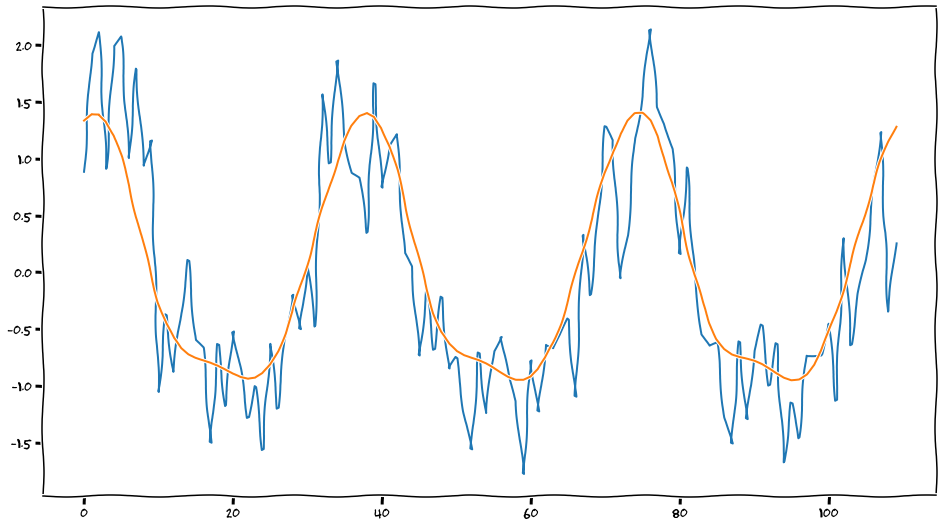

In [147]:
print("r2 score: ", r2_score(y_test_scaled, search.predict(X_test)))
print(search.best_params_)
plt.plot(y_test_scaled)
plt.plot(search.predict(X_test))

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f148de35a90>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f148de359e8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f148de35f28>]}

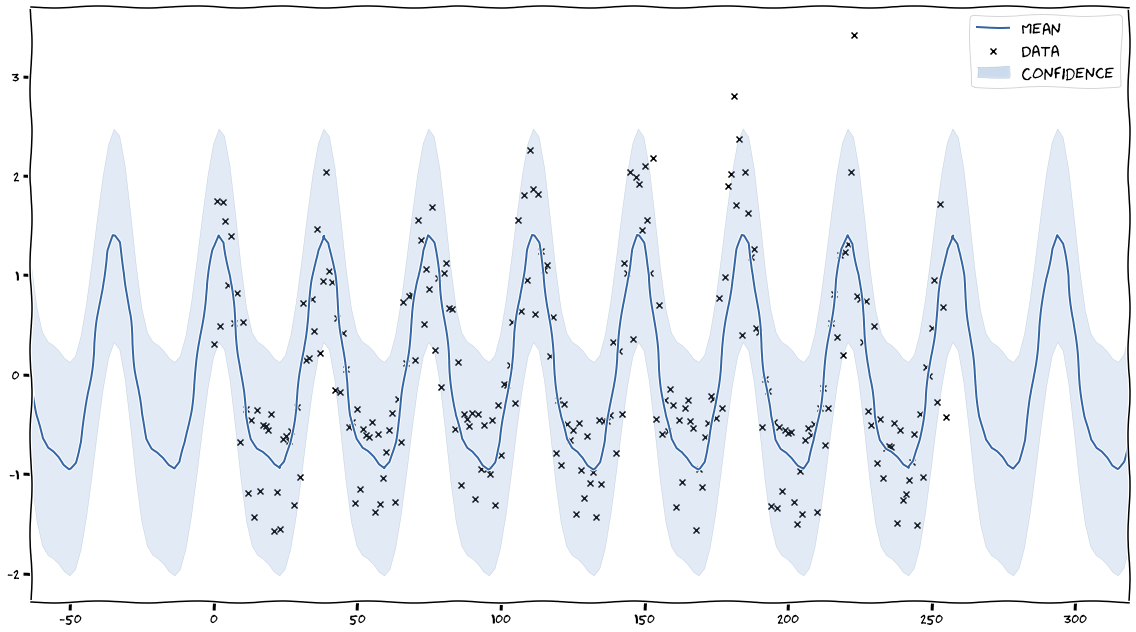

In [150]:
search.best_estimator_.model.plot()

## Comment
Below you can see another solution, that is basically taken from seminars, but slightly tuned

0.7115472897921009

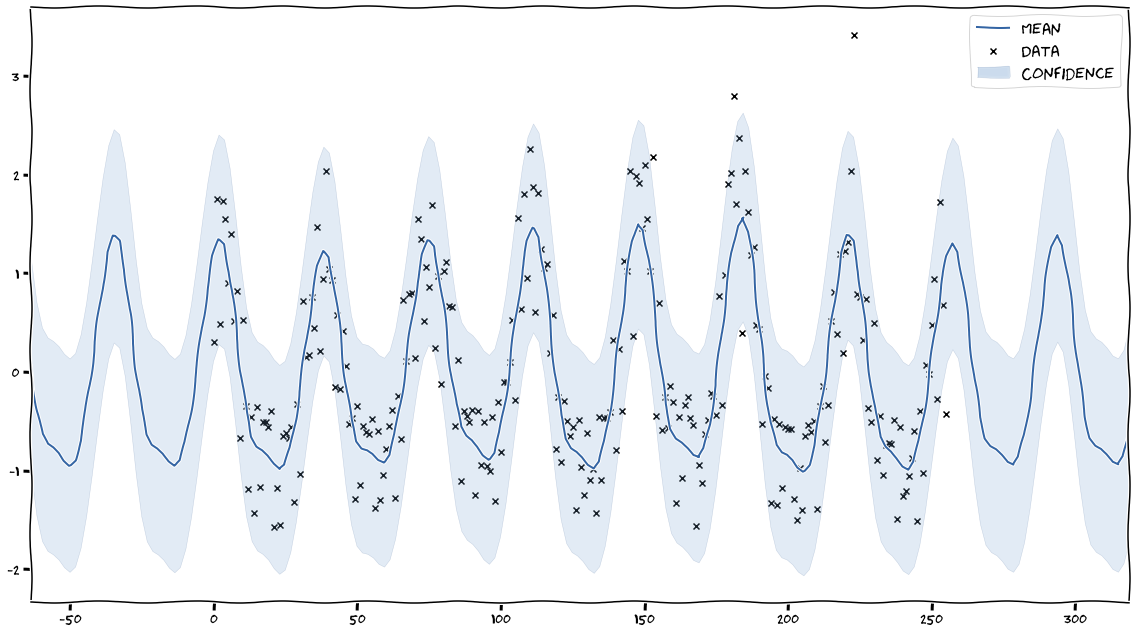

In [145]:
# actually, the part is taken from seminars, but with a bit tuned period ()
k_trend = Poly(1, order=1) + RBF(1)
k_periodicity = StdPeriodic(1, period=35)
k_noise = White(1) * Linear(1)

kernel = k_trend + k_periodicity + k_noise
model = GPRegression(X_train, y_train_scaled, kernel)
model.optimize('lbfgs')

# plot_model(X_train, y_train, model)
model.plot()
r2_score(y_test_scaled, model.predict(X_test)[0])

* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

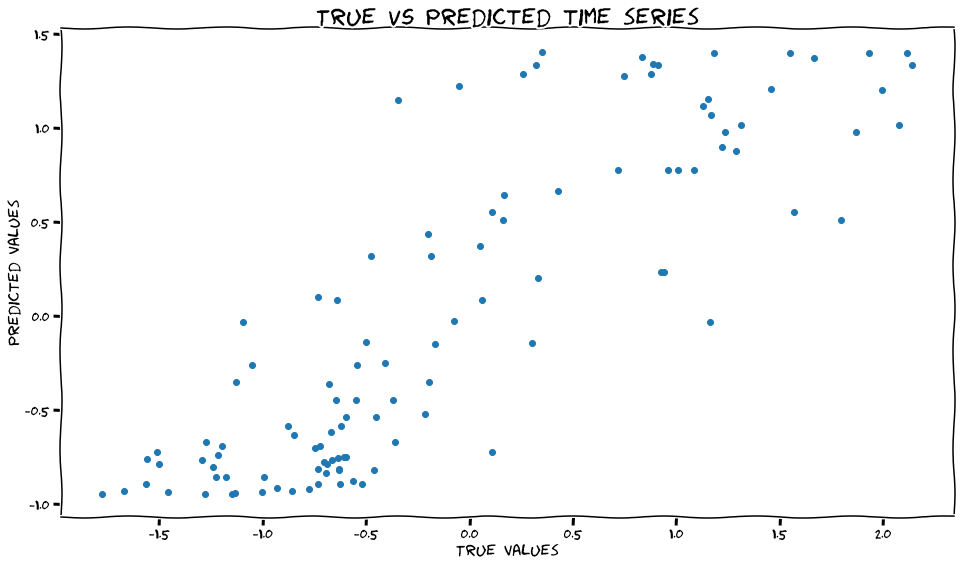

In [154]:
plt.figure()
plt.scatter(y_test_scaled, search.predict(X_test))
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True VS Predicted time series', fontsize=24)
plt.show()

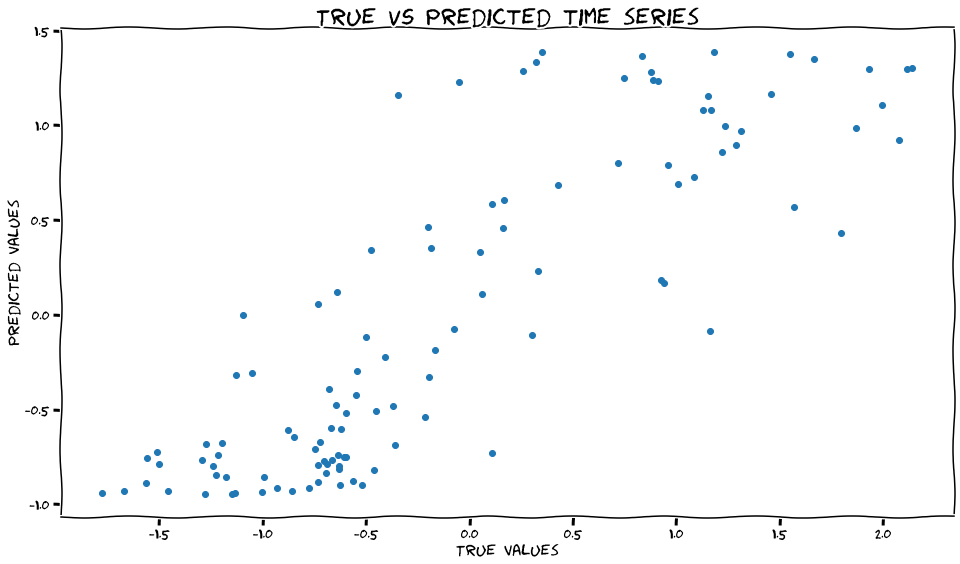

In [155]:
plt.figure()
plt.scatter(y_test_scaled, model.predict(X_test)[0])
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True VS Predicted time series', fontsize=24)
plt.show()